In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import numpy as np
from matchms import calculate_scores

from matchms.importing import load_from_mgf
from cudams.similarity import CudaCosineGreedy
from matchms.similarity import CosineGreedy
from cudams.utils import download
import matplotlib.pyplot as plt

references = list(load_from_mgf(download('pesticides.mgf')))
queries = references

kernel = CudaCosineGreedy()
scores_cu = kernel.matrix(references=references, queries=queries)
scores = CosineGreedy().matrix(references=references, queries=queries)


# plt.imshow(
#     scores_cu['score']
# )
# plt.imshow(
#     scores['score']
# )
np.isclose(scores['score'], scores_cu['score']).mean()
# scores = calculate_scores(
#   references=references,
#   queries=queries,
#   similarity_function=kernel,
# )
# # scores.scores_by_query(queries[42], 'CudaCosineGreedy_score', sort=True)
# scores.to_array()

1.0

In [3]:
references = list(load_from_mgf(download('pesticides.mgf')))

In [8]:

import numpy as np
from matchms import calculate_scores

from matchms.importing import load_from_mgf
from cudams.similarity import CudaModifiedCosine
from matchms.similarity import ModifiedCosine
from cudams.utils import download
import matplotlib.pyplot as plt

references = list(load_from_mgf(download('pesticides.mgf')))
queries = references

kernel = CudaModifiedCosine()
scores_cu = kernel.matrix(references=references, queries=queries)
scores = ModifiedCosine().matrix(references=references, queries=queries)


# plt.imshow(
#     scores_cu['score']
# )
# plt.imshow(
#     scores['score']
# )
np.isclose(scores['score'], scores_cu['score']).mean(), \
    np.isclose(scores['matches'], scores_cu['matches']).mean(), \

# scores = calculate_scores(
#   references=references,
#   queries=queries,
#   similarity_function=kernel,
# )
# # scores.scores_by_query(queries[42], 'CudaCosineGreedy_score', sort=True)
# scores.to_array()

(1.0, 1.0)

In [5]:
import matchms

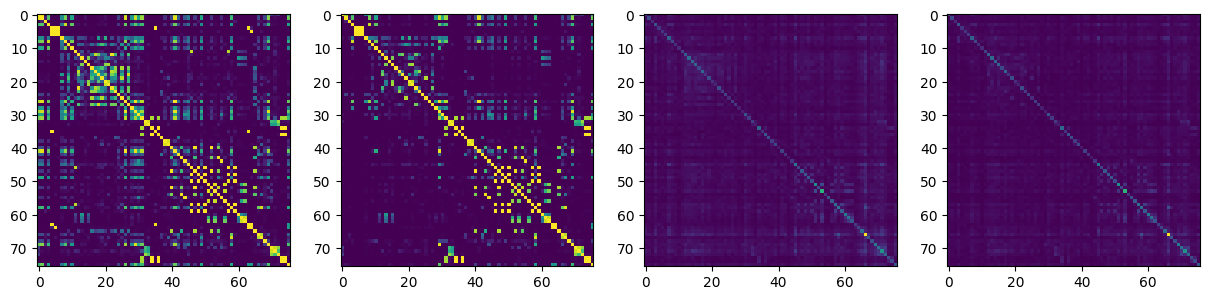

In [6]:
f, axs = plt.subplots(1,4, figsize=(15,8))

axs[0].imshow(scores['score'])
axs[1].imshow(scores_cu['score'])
axs[2].imshow(scores['matches'])
axs[3].imshow(scores_cu['matches'])

In [7]:
zero_pairs = np.zeros((0, 3))
nonzero_pairs = np.zeros((0, 3))
matching_pairs = np.concatenate((zero_pairs, nonzero_pairs), axis=0)
matching_pairs.shape

(0, 3)